# Specifying the folder where images are present

In [2]:
TrainingImagePath = "C:\\Users\\hp\\Desktop\\IMAGE BASICS\\train"

In [3]:
validationImagePath = "C:\\Users\\hp\\Desktop\\IMAGE BASICS\\validation"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#data generator creates new images by applying various transformations like rotation,flipping,cropping.
#it increases size of dataset and improves algorithm accuracy.

# base model

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./225)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./225)

# Generating the training data

In [9]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 200 images belonging to 25 classes.


In [ ]:
#generates batches of image data from directory 
#resizing into 64x64 pixels
#caategorical as images belong to different class

# Validation set

# Generating the validation data

In [11]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 50 images belonging to 25 classes.


# Libraries and model type

In [ ]:
# Create CNN Deep learning model

In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Initializing the Convolutional Neural Network

In [16]:
classifier = Sequential()

In [ ]:
#add layers one by one as they are initialized

# MODEL

In [ ]:
# STEP 1 Convolution
# Adding the first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

In [18]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [ ]:
#helps in feature extraction.

In [ ]:
#STEP 2- Max Pooling

In [20]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
#reduces dimensionality of input data, computation is efficient

In [ ]:
# Additional layer of convolution for better accuracy

In [22]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [23]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
#STEP 3- Flattening

In [25]:
classifier.add(Flatten())

In [ ]:
#converts output from above layers into 1D array

In [ ]:
#STEP 4 - Fully connected neural network

In [27]:
classifier.add(Dense(64, activation='relu'))

In [28]:
classifier.add(Dense(25, activation='softmax')) #25 - number of neurons

In [ ]:
#final classification maps feature learned by previous layers to output classes

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

# Compiler

In [30]:
# Compiling the CNN

In [31]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

In [ ]:
#configuration of model
#measures difference b/w predicted and actual class probabilties for i/p
#used to adjust weight of model during training to minimise loss function
#evaluate % of correctly classified images

# Execution of model

In [32]:
# Starting the model training

In [33]:
history = classifier.fit_generator(training_set, epochs =20,
                                  validation_data=validation_set)

C:\Users\hp\AppData\Local\Temp\ipykernel_7948\2354014473.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =20,


Epoch 1/20
10/10 [==============================] - 11s 1s/step - loss: 3.2445 - accuracy: 0.0450 - val_loss: 3.0873 - val_accuracy: 0.1600
Epoch 2/20
10/10 [==============================] - 8s 839ms/step - loss: 2.7988 - accuracy: 0.3300 - val_loss: 2.5455 - val_accuracy: 0.3600
Epoch 3/20
10/10 [==============================] - 9s 963ms/step - loss: 2.0753 - accuracy: 0.5000 - val_loss: 1.8452 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 8s 824ms/step - loss: 1.1930 - accuracy: 0.7200 - val_loss: 1.3840 - val_accuracy: 0.6400
Epoch 5/20
10/10 [==============================] - 8s 850ms/step - loss: 0.5854 - accuracy: 0.8900 - val_loss: 1.0909 - val_accuracy: 0.7000
Epoch 6/20
10/10 [==============================] - 8s 848ms/step - loss: 0.2407 - accuracy: 0.9550 - val_loss: 1.0403 - val_accuracy: 0.7200
Epoch 7/20
10/10 [==============================] - 8s 831ms/step - loss: 0.1230 - accuracy: 0.9800 - val_loss: 0.8671 - val_accuracy: 0.7600
Epoch 8/

# Accuracy base model

In [34]:
#Displaying curves of loss and accuracy during training

In [35]:
import matplotlib.pyplot as plt

In [36]:
acc = history.history['accuracy']

In [37]:
val_acc = history.history['val_accuracy']

In [38]:
loss = history.history['loss']

In [39]:
val_loss = history.history['val_loss']

In [40]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

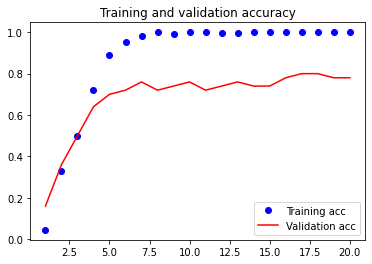

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 432x288 with 0 Axes>

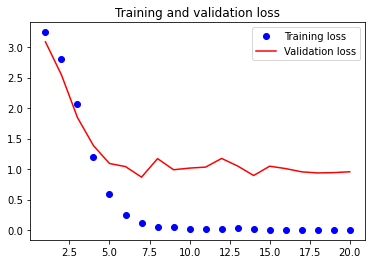

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [43]:
# Lets improve

# Model 2

In [45]:
# Adding parameters in the ImageDatagenerator

In [46]:
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [47]:
# No transformations are done on the testing images

In [48]:
test_datgen = ImageDataGenerator(rescale=1./225)

In [49]:
# Generating the training data

In [50]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 200 images belonging to 25 classes.


In [51]:
# Generating the validation data

In [52]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 50 images belonging to 25 classes.


In [53]:
#Create Cnn deep learning model

In [54]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [55]:
# Initializing the Convolutional Neural Network

In [56]:
classifier = Sequential()

In [57]:
# Convolution

In [58]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [59]:
#Max Pooling

In [60]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [61]:
# Additional layer of convolution for better accuracy

In [62]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [63]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [64]:
#Flattening

In [65]:
classifier.add(Flatten())

In [66]:
#Fully connected neural network

In [67]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [68]:
classifier.add(Dense(25, activation='softmax'))#output layer

In [69]:
classifier.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [70]:
#Compiler

In [71]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [72]:
#Execute

In [73]:
#Starting the model training

In [74]:
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

C:\Users\hp\AppData\Local\Temp\ipykernel_7948\346272482.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =100,


Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 3.3360 - accuracy: 0.0450 - val_loss: 3.2019 - val_accuracy: 0.0800
Epoch 2/100
10/10 [==============================] - 8s 866ms/step - loss: 3.1888 - accuracy: 0.0700 - val_loss: 3.0879 - val_accuracy: 0.0800
Epoch 3/100
10/10 [==============================] - 8s 832ms/step - loss: 3.0612 - accuracy: 0.0750 - val_loss: 2.9013 - val_accuracy: 0.1200
Epoch 4/100
10/10 [==============================] - 9s 870ms/step - loss: 2.9059 - accuracy: 0.1600 - val_loss: 2.7258 - val_accuracy: 0.1800
Epoch 5/100
10/10 [==============================] - 8s 838ms/step - loss: 2.7511 - accuracy: 0.1600 - val_loss: 2.5679 - val_accuracy: 0.2400
Epoch 6/100
10/10 [==============================] - 8s 840ms/step - loss: 2.6374 - accuracy: 0.2100 - val_loss: 2.4349 - val_accuracy: 0.2400
Epoch 7/100
10/10 [==============================] - 8s 853ms/step - loss: 2.5101 - accuracy: 0.2550 - val_loss: 2.2912 - val_accuracy: 0.3600
E

In [ ]:
#Displaying curves of loss and accuracy during training

In [76]:
import matplotlib.pyplot as plt

In [77]:
acc = history.history['accuracy']

In [78]:
val_acc = history.history['val_accuracy']

In [79]:
loss = history.history['loss']

In [80]:
val_loss = history.history['val_loss']

In [81]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

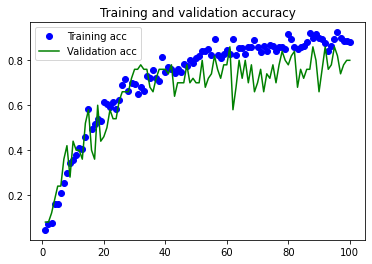

<Figure size 432x288 with 0 Axes>

In [82]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

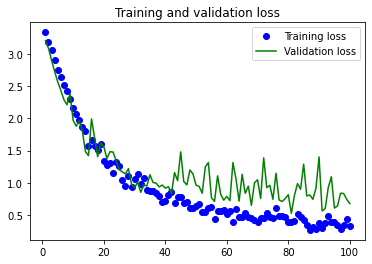

<Figure size 432x288 with 0 Axes>

In [83]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()